# Estudo de gastos dos Deputados Federais nos meses de 01 a 10/2018

### Objetivo
#### O objetivo desse estudo é entende, fiscalizar e divulgar o resultado de modo que saibamos como os deputados estão gastando.

### Dados obtidos de http://www.camara.leg.br/cotas/Ano-2018.csv.zip no dia 21/11/2018 as 08:00

## Índice
#### 1 - Limpeza de Dados (Data Cleaning)
#### 2 - Análise dos Dados (Data Analysis) e visualização dos Dados (Data Visualization)
#### 3 - Conclusão

### Bora começar
#### Bom vamos começar importando as bibliotecas para tratamento e análise de dados.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

sns.set(style="whitegrid")
%matplotlib inline

### Carregando os dados do arquivo csv baixado

In [27]:
deputados = pd.read_csv('Ano-2018.csv',sep=';',encoding='utf-8',quoting=csv.QUOTE_NONE)

### 1 - Limpeza de Dados (Data Cleaning)
#### Tamanho da amostrada de dados

In [55]:
deputados.shape

(226495, 29)

In [56]:
deputados.columns

Index(['txNomeParlamentar', 'idecadastro', 'nuCarteiraParlamentar',
       'nuLegislatura', 'sgUF', 'sgPartido', 'codLegislatura', 'numSubCota',
       'txtDescricao', 'numEspecificacaoSubCota', 'txtDescricaoEspecificacao',
       'txtFornecedor', 'txtCNPJCPF', 'txtNumero', 'indTipoDocumento',
       'datEmissao', 'vlrDocumento', 'vlrGlosa', 'vlrLiquido', 'numMes',
       'numAno', 'numParcela', 'txtPassageiro', 'txtTrecho', 'numLote',
       'numRessarcimento', 'vlrRestituicao', 'nuDeputadoId', 'ideDocumento'],
      dtype='object')

#### Verificando dados faltantes tipos de dados.

In [57]:
deputados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226495 entries, 0 to 226494
Data columns (total 29 columns):
txNomeParlamentar            226495 non-null object
idecadastro                  225863 non-null float64
nuCarteiraParlamentar        225863 non-null float64
nuLegislatura                226495 non-null int64
sgUF                         225863 non-null object
sgPartido                    225863 non-null object
codLegislatura               225863 non-null float64
numSubCota                   226495 non-null int64
txtDescricao                 226495 non-null object
numEspecificacaoSubCota      226495 non-null int64
txtDescricaoEspecificacao    53367 non-null object
txtFornecedor                226495 non-null object
txtCNPJCPF                   202000 non-null float64
txtNumero                    216801 non-null object
indTipoDocumento             226495 non-null int64
datEmissao                   221121 non-null object
vlrDocumento                 226495 non-null object
vlrGlo

#### Convertendo campos para valores
Algumas colunas de valores não estão formato de float, vamos converter!

In [29]:
deputados['vlrGlosa'] = deputados['vlrGlosa'].str.replace(',','.').astype('float')
deputados['vlrDocumento'] = deputados['vlrDocumento'].str.replace(',','.').astype('float')
deputados['vlrLiquido'] = deputados['vlrLiquido'].str.replace(',','.').astype('float')

deputados['txtCNPJCPF'] = deputados['txtCNPJCPF'].astype(str)

#### Visualizar dados Faltantes

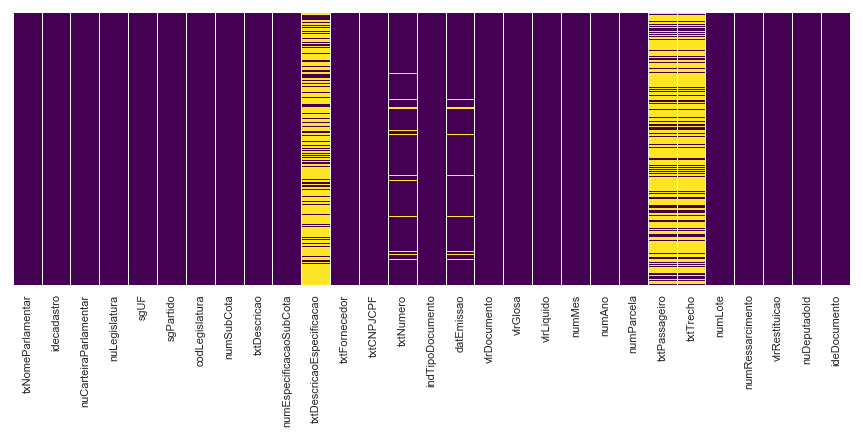

In [4]:
plt.figure(figsize=(15,5))
sns.heatmap(deputados.isnull(), yticklabels=False, cbar=False, cmap='viridis')

##### Este gráfico foi adaptado para mostrar valores ausentes de amarelo.

#### Observando o gráfico acima podemos constatar que as colunas "txtPassageiro", "txtTrecho" e "txtDescricaoEspecificacao" estão com muitos dados faltantes. As colunas que aparece com listas amarelas vamos analisar individualmente para ver se tem impacto em nossa análise exploratória.

#### Para essa analise não vamos precisar de nenhuma dessas colunas, então vamos e em seguida verificar se existe dados referente ao 11 ou 12  que não é vão estar completos e por isso não vamos analisar.


* Passo 1 dropar essas 5 colunas. 
* Passo 2 apagar dados referênte ao mês 11(nossa análise é até o mês 10)

In [30]:
deputados.drop(columns=['txtPassageiro', 'txtTrecho', 'txtDescricaoEspecificacao','txtNumero','datEmissao'], axis=1, inplace=True)
deputados.dropna(subset=['sgUF'], inplace=True)
deputados = deputados[deputados.numMes < 11]

#### Feito os devidos tratamentos vamos ver como está nosso gráfico.

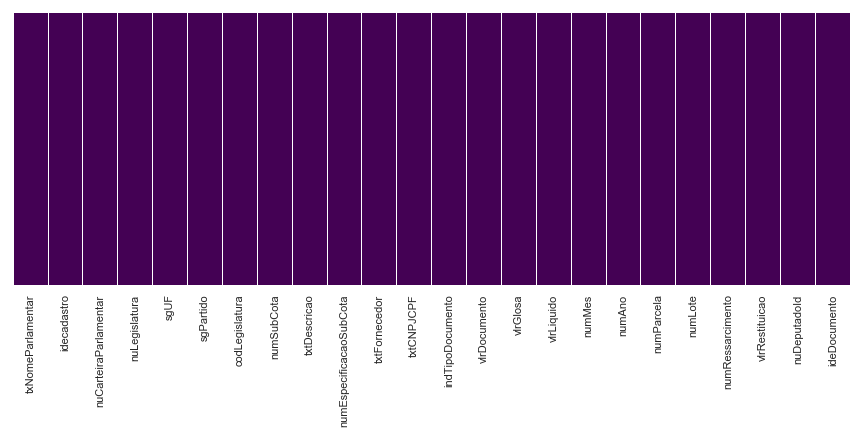

In [61]:
plt.figure(figsize=(15,5))
sns.heatmap(deputados.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### 2 - Análise dos Dados (Data Analysis) e visualização dos Dados (Data Visualization)

#### A câmara dos deputados é composta por 513 deputados mas nosso número total é de 553, devemos lembrar que quando um deputado sai do cargo isso por "n" motivos o suplente assume por isso os 553.

In [77]:
deputados['txNomeParlamentar'].nunique()

553

[Text(0, 0.5, 'Números de Deputados'), Text(0.5, 0, 'Estados')]

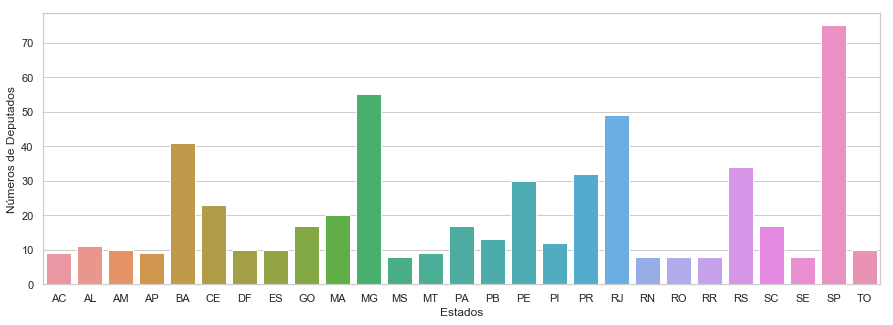

In [73]:
n_dep = pd.DataFrame(deputados.groupby('sgUF')['txNomeParlamentar'].nunique())
plt.figure(figsize=(15,5))
x = sns.barplot(x=n_dep.index,y='txNomeParlamentar', data=n_dep)
x.set(xlabel = 'Estados', ylabel = 'Números de Deputados')


#### O estado com maior número de deputados é de longe São Paulo mas será que proporcionalmente é o que mais gasta?

#### Soma dos gastos totais até o mês de outubro.

In [32]:
soma_total = round(sum(deputados['vlrLiquido']),2)
soma_total

152373592.72

A soma é de impressionantes R$ 152.375.572,72 isso sem considerar salários, auxilio moradia, ternos... São despesas avulsas.

#### TOP 20 dos deputados

In [79]:
df_gasto_dep = pd.DataFrame(deputados.groupby(['txNomeParlamentar','sgPartido','sgUF'])['vlrLiquido'].sum())
df_gasto_dep.sort_values('vlrLiquido', ascending=False, inplace=True)
df_gasto_dep['vlrLiquido'] = round(df_gasto_dep['vlrLiquido'],2)
vl_total = sum(deputados['vlrLiquido'])
df_gasto_dep_20 = df_gasto_dep[0:20]
df_gasto_dep_20

,,,vlrLiquido
txNomeParlamentar,sgPartido,sgUF,
PEDRO FERNANDES,PTB,MA,446829.37
RAFAEL MOTTA,PSB,RN,440026.41
VICENTINHO JÚNIOR,PR,TO,438610.87
JOZI ARAÚJO,PODE,AP,436307.15
VICTOR MENDES,MDB,MA,430630.12
RONALDO LESSA,PDT,AL,422541.51
ANGELIM,PT,AC,418614.17
CAJAR NARDES,PODE,RS,416370.28
GONZAGA PATRIOTA,PSB,PE,415040.08


In [80]:
print('O top 20 representa',round(df_gasto_dep_20['vlrLiquido'].sum() / df_gasto_dep['vlrLiquido'].sum() * 100,2),'% dos gastos totais.')

O top 20 representa 5.49 % dos gastos totais.


[Text(0, 0.5, 'Deputados'),
 Text(0.5, 0, 'Valor Liquído'),
 Text(0.5, 1.0, 'Gasto por tipo Atividade')]

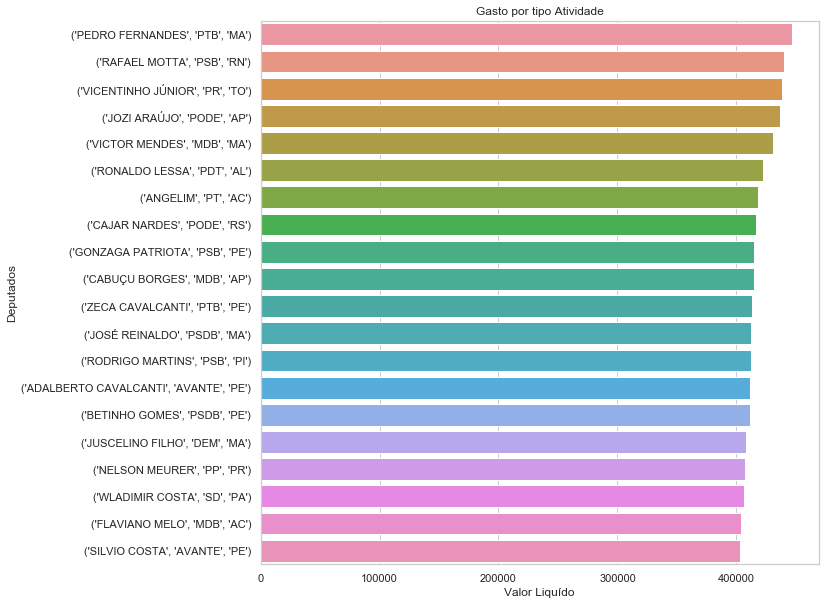

In [66]:
plt.figure(figsize=(10,10))
p = sns.barplot(y=df_gasto_dep_20.index, x='vlrLiquido', data=df_gasto_dep_20, hue_order='vlrLiquido')
p.set(ylabel = 'Deputados', xlabel = 'Valor Liquído',title='Gasto por tipo Atividade')

##### Soma de gastos médio dos deputados por estado.
#### Plotar gráfico com gasto médio por UF

[Text(0, 0.5, 'Gasto Médio'), Text(0.5, 0, 'Estados')]

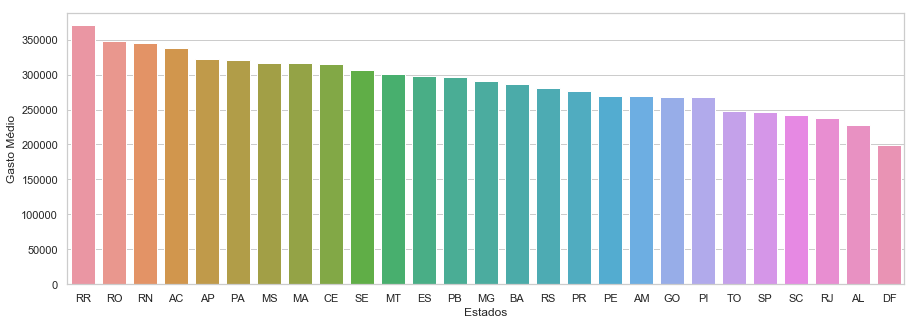

In [8]:
df_gasto_medio = pd.DataFrame(deputados.groupby('sgUF')['vlrLiquido'].sum())
df_gasto_medio['qtd']=deputados.groupby('sgUF')['txNomeParlamentar'].nunique()
df_gasto_medio['Gasto Médio'] = round(df_gasto_medio['vlrLiquido'] / df_gasto_medio['qtd'],2)
df_gasto_medio.sort_values('Gasto Médio',ascending=False, inplace=True)

plt.figure(figsize=(15,5))
p = sns.barplot(x=df_gasto_medio.index , y='Gasto Médio',data=df_gasto_medio)
p.set(ylabel ='Gasto Médio', xlabel='Estados' )

#### Neste gráfico podemos observar que estados mais longes tende a ter um gasto maior mesmo contendo menor números de deputados. Um exemplo disso é nosso primeiro colocado RR tem apenas 8 deputados enquanto SP que tem 75 deputados e está na vigésima terceira posição

In [69]:
gastos_por_desc=pd.DataFrame(deputados.groupby('txtDescricao')['vlrLiquido'].sum())
gastos_por_desc.sort_values('vlrLiquido',ascending=False, inplace=True)
gastos_por_desc['vlrLiquido']=round(gastos_por_desc['vlrLiquido'],2)
gastos_por_desc['%'] = round(gastos_por_desc['vlrLiquido'] / soma_total  * 100,2)
gastos_por_desc

,vlrLiquido,%
txtDescricao,,
Emissão Bilhete Aéreo,33384121.72,21.91
DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,32070641.04,21.05
LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,21326580.60,14.00
MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR,18460704.00,12.12
"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",15688980.49,10.30
COMBUSTÍVEIS E LUBRIFICANTES.,14643708.87,9.61
TELEFONIA,6202035.77,4.07
SERVIÇOS POSTAIS,2234511.89,1.47
LOCAÇÃO OU FRETAMENTO DE AERONAVES,2156526.06,1.42


[Text(0, 0.5, 'Descrição'),
 Text(0.5, 0, '%'),
 Text(0.5, 1.0, 'Gasto por tipo Atividade')]

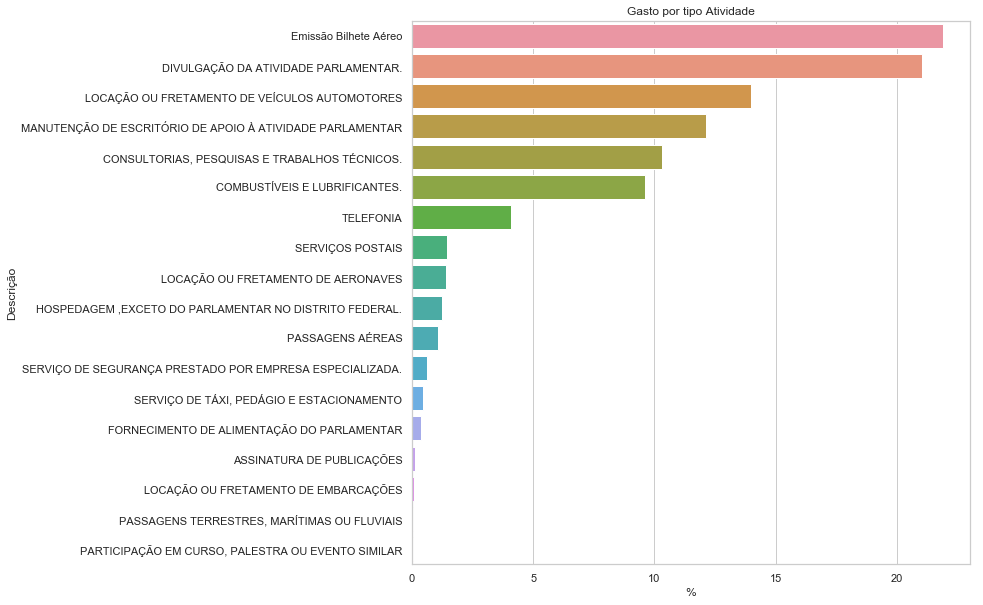

In [46]:
plt.figure(figsize=(10,10))
p = sns.barplot(y=gastos_por_desc.index ,x='%',data=gastos_por_desc, hue_order='vlrLiquido', orient='h')
p.set(ylabel = 'Descrição', xlabel = '%', title='Gasto por tipo Atividade')

* As categorias "Emissão Bilhete Aéreo" e "PASSAGENS AÉREAS" são tratadas em 2 categorias por que será?
* Outra categoria que me chama a atenção 'DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.' por se encontrar na segunda posição.
* "PARTICIPAÇÃO EM CURSO, PALESTRA OU EVENTO SIMILAR" é mínima.
* Se fossemos classificar as categorias Serviços de transporte em geral é de longe a que maiores despesas.


#### Gastos por mês

In [59]:
dic= {1:'Janeiro',2:'Fevereiro',3:'Março',4:'Abril',5:'Maio',6:'Junho',7:'Julho',
      8:'Agosto',9:'Setembro',10:'Outubro',11:'Novembro',12:'Dezembro'}
mes_extenso = lambda mes:dic[mes] if mes in dic else 0 

In [58]:
gasto_mes = pd.DataFrame(deputados.groupby(['numMes'])['vlrLiquido'].sum())
gasto_mes['vlrLiquido']=round(gasto_mes['vlrLiquido'], 2)
#gasto_mes.sort_values('vlrLiquido',ascending=False, inplace=True)
gasto_mes.reset_index('numMes',inplace=True)
gasto_mes['numMes'] = gasto_mes['numMes'].apply(mes_extenso)
gasto_mes

,numMes,vlrLiquido
0,Janeiro,15212307.79
1,Fevereiro,18172103.91
2,Março,20981074.36
3,Abril,20017335.63
4,Maio,21969155.04
5,Junho,15792499.75
6,Julho,14163706.48
7,Agosto,10059906.49
8,Setembro,7057824.35
9,Outubro,8947678.92


[Text(0, 0.5, 'Valor Líquido'), Text(0.5, 0, 'Mês')]

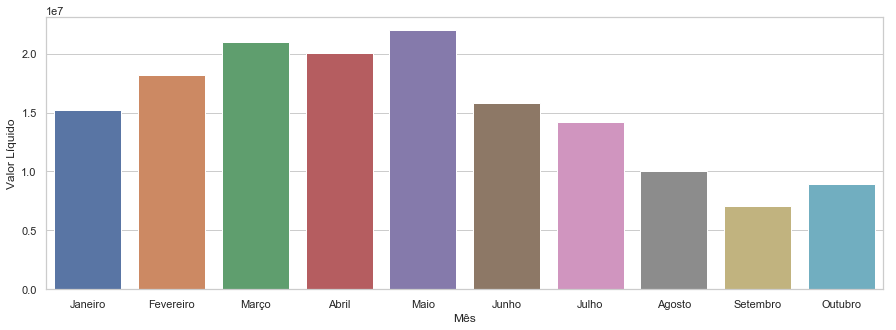

In [59]:
plt.figure(figsize=(15,5))
g=sns.barplot(x='numMes', y='vlrLiquido', data=gasto_mes, hue_order='vlrLiquido' )
g.set(xlabel = 'Mês', ylabel='Valor Líquido')

#### Neste gráfico podemos ter uma melhor  por que estas 2 categorias estão com valores tão altos, este ano tivemos eleição e os 5 primeiros meses do ano da entender que se faz necessário divulgar  e viajar pelo Brasil com objetivo de releição. 

In [63]:
dep = deputados[deputados.txtDescricao.isin(["DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.","Emissão Bilhete Aéreo"])]
gastos_maiores_meses = pd.DataFrame(dep.groupby(['txtDescricao','numMes'])['vlrLiquido'].sum())
#gastos_maiores_meses.sort_values(['vlrLiquido','numMes'],ascending=False, inplace=True)
gastos_maiores_meses.reset_index(['txtDescricao','numMes'],inplace=True)
gastos_maiores_meses['numMes'] = gastos_maiores_meses['numMes'].apply(mes_extenso)
gastos_maiores_meses['vlrLiquido']=round(gastos_maiores_meses['vlrLiquido'],2)
gastos_maiores_meses['%'] = round(gastos_maiores_meses['vlrLiquido'] / soma_total  * 100,2)

[Text(0, 0.5, 'Gasto percentual'), Text(0.5, 0, 'Mês')]

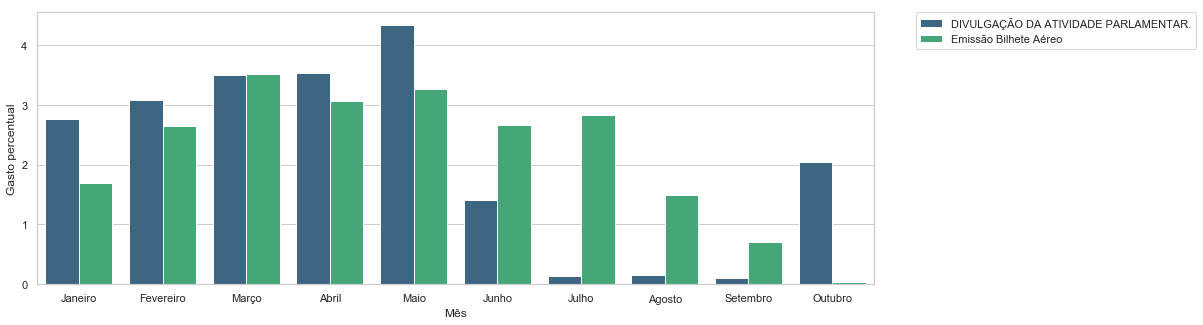

In [64]:
plt.figure(figsize=(15,5))
g=sns.barplot(x='numMes',y='%',data=gastos_maiores_meses, hue='txtDescricao',palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
g.set(xlabel = 'Mês', ylabel='Gasto percentual')

#### Gasto médio proporcinal dos deputados por sigla partidária

In [65]:
gastos_part = pd.DataFrame(deputados.groupby('sgPartido')['vlrLiquido'].sum())
gastos_part['Numero Deputados'] = deputados.groupby('sgPartido')['txNomeParlamentar'].nunique()
gastos_part['Gasto Médio'] = round(gastos_part['vlrLiquido'] / gastos_part['Numero Deputados'] ,2)
gastos_part.sort_values('Gasto Médio',ascending=False, inplace=True)

[Text(0, 0.5, 'Gasto Médio'), Text(0.5, 0, 'Partidos')]

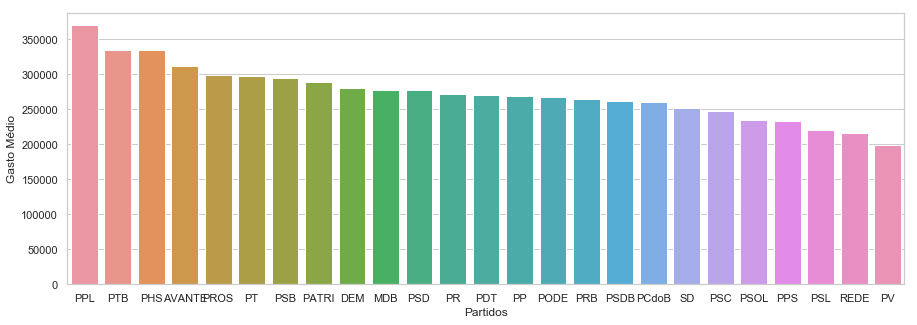

In [67]:
plt.figure(figsize=(15,5))
p = sns.barplot(x = gastos_part.index, y='Gasto Médio', data=gastos_part, hue_order='Gasto Médio')
p.set(xlabel = 'Partidos', ylabel='Gasto Médio')

In [66]:
print('Números de partidos no período: ', gastos_part.shape[0])

Números de partidos no período:  25


#### Gasto médio diário

In [69]:
pd.DataFrame(round(deputados.groupby('numAno')['vlrLiquido'].sum() / 300,2))

,vlrLiquido
numAno,
2018,507911.98


#### Gasto médio mensal

In [70]:
pd.DataFrame(round(deputados.groupby('numAno')['vlrLiquido'].sum() / 10,2))

,vlrLiquido
numAno,
2018,15237359.27


### 3 - Conclusão

Em geral os estados mais longe do Distrito Federal lidera as dispesas.
Gastos com transporte em geral são as categorias que mais com maior dispesas.
